<a href="https://colab.research.google.com/github/Venkatakkinapalli/Python-Examples/blob/master/Dimentionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install watermark

In [0]:
%load_ext watermark

In [4]:
%watermark -v -d -a 'Sebastian Raschka' -p scikit-learn,matplotlib,numpy,pandas

/usr/local/lib/python3.6/dist-packages/watermark/watermark.py:155: DeprecationWarning: Importing scikit-learn as `scikit-learn` has been depracated and will not be supported anymore in v1.7.0. Please use the package name `sklearn` instead.
  DeprecationWarning)


Sebastian Raschka 2019-04-17 

CPython 3.6.7
IPython 5.5.0

sklearn 0.20.3
matplotlib 3.0.3
numpy 1.16.2
pandas 0.23.4


In [0]:
%matplotlib inline

In [0]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

In [0]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [0]:
plt.figure(figsize=(10, 10))
for cnt in range(9):
  plt.subplot(3, 3, cnt+1)

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

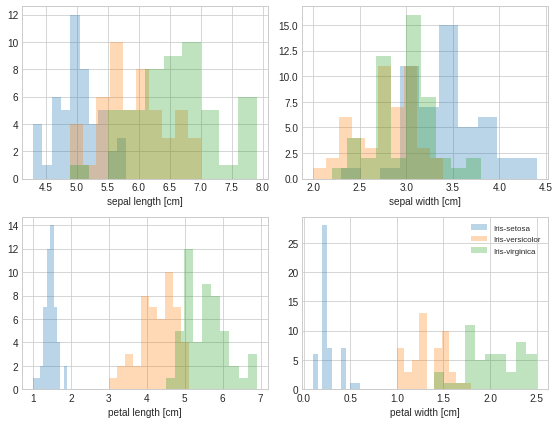

In [66]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()


In [0]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [79]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [80]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [81]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [0]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

In [93]:
np.linalg.norm(eig_vecs[3])

1.0

In [85]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')



Everything ok!


In [107]:
len(eig_vals)

4

In [0]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [0]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [108]:
[i+1 for i in range(len(eig_vals))]

[1, 2, 3, 4]

In [137]:
Y[y=='Iris-setosa'][:,0]

array([-2.26454173, -2.0864255 , -2.36795045, -2.30419716, -2.38877749,
       -2.07053681, -2.44571134, -2.23384186, -2.34195768, -2.18867576,
       -2.16348656, -2.32737775, -2.22408272, -2.63971626, -2.19229151,
       -2.25146521, -2.20275048, -2.19017916, -1.89407429, -2.33994907,
       -1.91455639, -2.2046454 , -2.77416979, -1.82041156, -2.2282175 ,
       -1.95702401, -2.05206331, -2.16819365, -2.14030596, -2.26879019,
       -2.14455443, -1.8319381 , -2.60820287, -2.43795086, -2.18867576,
       -2.2111199 , -2.04441652, -2.18867576, -2.4359522 , -2.1705472 ,
       -2.28652724, -1.87170722, -2.55783442, -1.96427929, -2.13337283,
       -2.07535759, -2.38125822, -2.39819169, -2.22678121, -2.20595417])

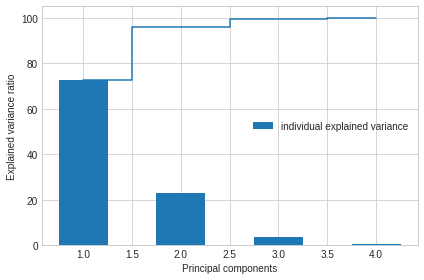

In [120]:
with plt.style.context('seaborn-whitegrid'):
 
    plt.figure(figsize=(6, 4))
    x = [i+1 for i in range(len(eig_vals))]

    plt.bar(x, var_exp, width=0.5, bottom=None, align='center', data=None)
    plt.step(x, cum_var_exp, where='mid')

    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


In [133]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
eig_pairs[1][1].reshape(4,1)))

matrix_w

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [0]:
Y = X_std.dot(matrix_w)

In [140]:
Y[y=='Iris-setosa'][:,0].shape

(50,)

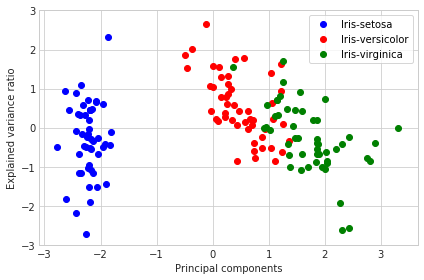

In [141]:
with plt.style.context('seaborn-whitegrid'):
  for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),(
          'blue', 'red', 'green')):
      plt.scatter(Y[y==lab][:,0],Y[y==lab][:,1], c = col, label = lab )
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
